In [51]:
import numpy as np
import pandas as pd
import seaborn as sns

In [52]:
data = pd.read_csv("F:/hepatitis_csv.csv")

In [53]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [54]:
data.tail()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live
154,43,female,True,False,True,False,False,True,False,True,True,True,False,1.2,100.0,19.0,3.1,42.0,True,die


In [55]:
data.shape

(155, 20)

In [57]:
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [59]:
data.nunique()

age                49
sex                 2
steroid             2
antivirals          2
fatigue             2
malaise             2
anorexia            2
liver_big           2
liver_firm          2
spleen_palpable     2
spiders             2
ascites             2
varices             2
bilirubin          34
alk_phosphate      83
sgot               84
albumin            29
protime            44
histology           2
class               2
dtype: int64

In [63]:
#cleaning the data
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [64]:
data.dtypes

age                  int64
sex                  int64
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class                int64
dtype: object

In [58]:
replacements = {'FALSE': 0,
               'TRUE': 1,
               'die': 0,
               'live': 1,
               ' ': np.nan,
               'female': 0,
               'male': 1}

data.replace(replacements, inplace = True)

In [16]:
data = data.astype(float)

In [20]:
total_of_patients = data.shape[0]
total_of_live_patients = (np.sum(data['class'] == 1)/total_of_patients)*100
total_of_dead_patients = (np.sum(data['class'] == 0)/total_of_patients)*100
print("Living patients:", round(total_of_live_patients,2),"%")
print("Dead patients:", round(total_of_dead_patients,2),"%")

Living patients: 79.35 %
Dead patients: 20.65 %


In [66]:
variables = ['age', 'bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot']
data[variables].describe()

,age,bilirubin,protime,albumin,alk_phosphate,sgot
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [22]:
categorical_variables = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable',
'spiders','ascites','varices', 'histology']
data[categorical_variables].apply(pd.Series.value_counts)

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70


In [23]:
hepatitis_analysis = data.dropna()
interesting_values_x = ['albumin', 'anorexia','alk_phosphate', 'ascites', 'bilirubin', 'protime', 'sgot', 'class']
hepatitis_analysis = hepatitis_analysis[interesting_values_x]
hepatitis_analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1.0
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1.0
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1.0
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1.0
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1.0


In [25]:
corelation = hepatitis_analysis.corr()

<AxesSubplot:>

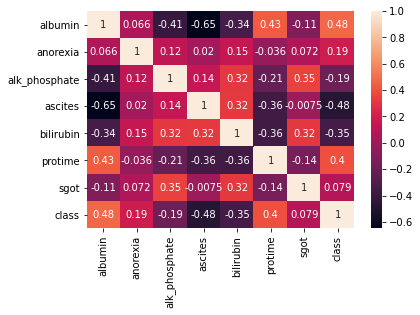

In [26]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

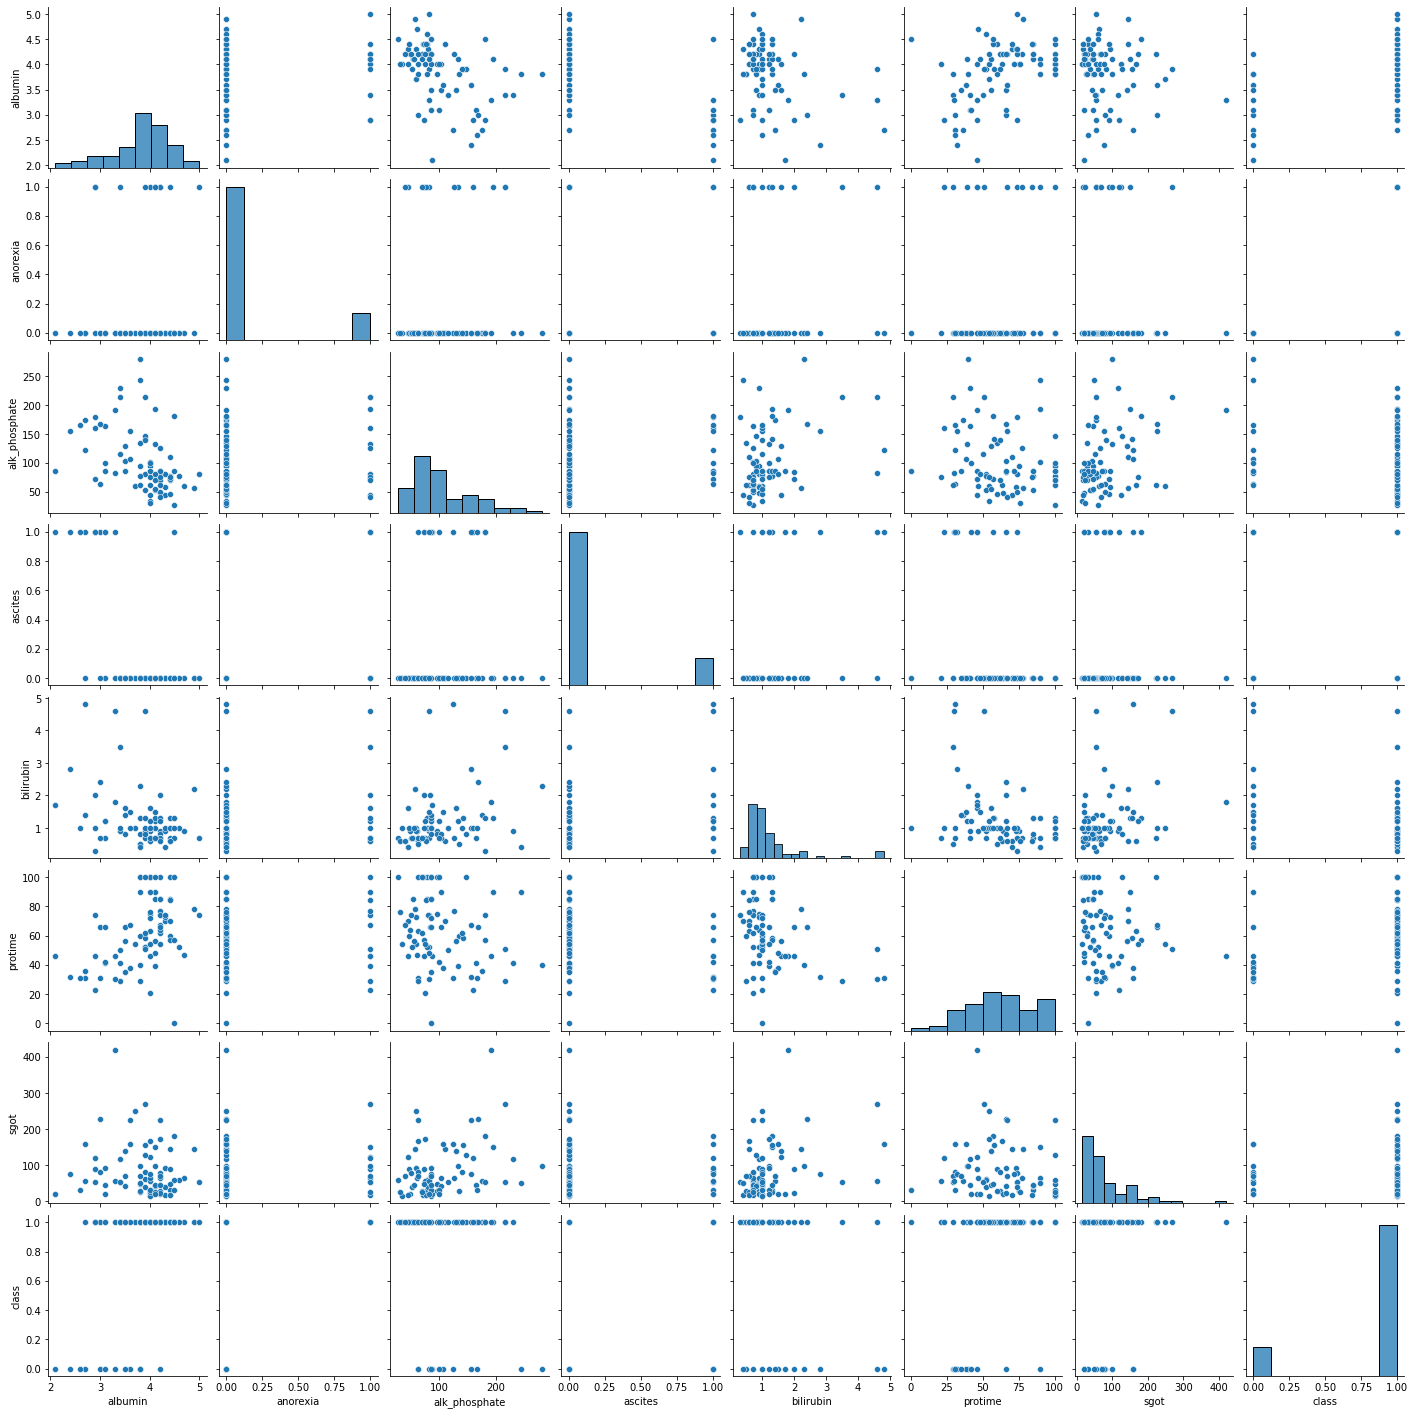

In [27]:
sns.pairplot(hepatitis_analysis)

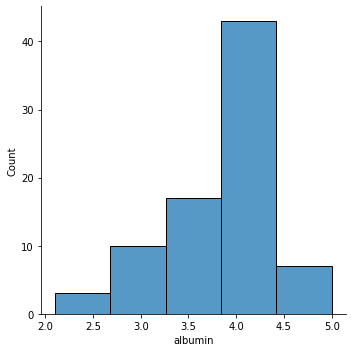

In [44]:
sns.displot(hepatitis_analysis['albumin'], bins=5)

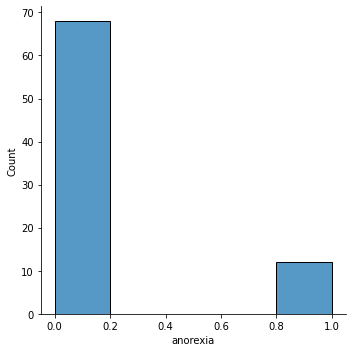

In [43]:
sns.displot(hepatitis_analysis['anorexia'], bins=5)

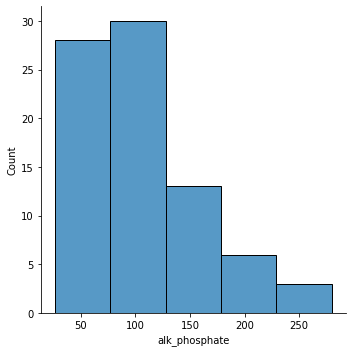

In [42]:
sns.displot(hepatitis_analysis['alk_phosphate'], bins=5)

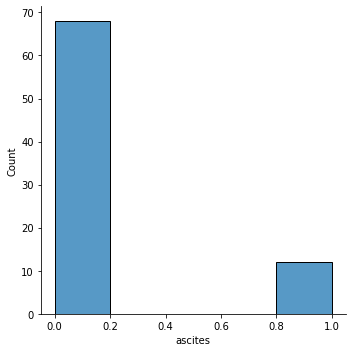

In [45]:
sns.displot(hepatitis_analysis['ascites'], bins=5)

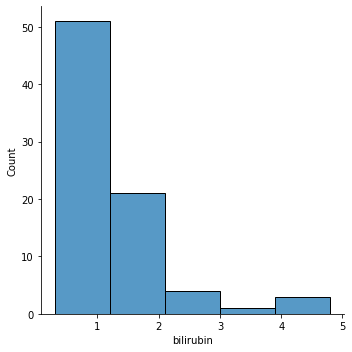

In [40]:
sns.displot(hepatitis_analysis['bilirubin'], bins=5)

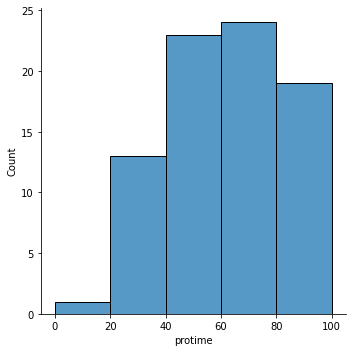

In [39]:
sns.displot(hepatitis_analysis['protime'], bins=5)

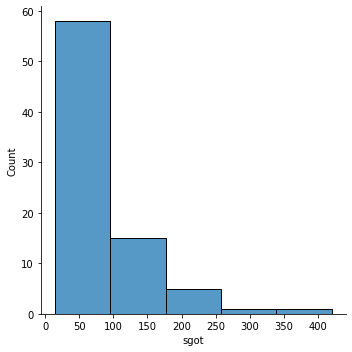

In [38]:
sns.displot(hepatitis_analysis['sgot'], bins=5)